# <font color='maroon'>Correlation matrix</font>

A correlation matrix contains $n$ number of rows and $n$ number of columns. Each variable in the dataset is represented in the rows and in the columns. The matrix entries correlation measures of the variable along the row and the variable along the column. The diagonal entries equal one. A variable is highly positively correlated with itself. The matrix will show the measure of correlation between the variables.


### The dataset

The dataset we'll use comes from the [Australian government website](https://data.gov.au/dataset/credit-unions-selected-assets-and-liabilities). It contains information on selected assets and liabilities figures submitted by credit unions referred to as authorised deposit-taking institutions, ADIs. The description of the variables in the dataset are provided as follows:

* ‘Cash and liquid assets’ is composed of ‘Cash’, ‘Balances with ADIs’ and ‘Other’. None of these items include bills of exchange, bills receivable, remittances in transit or certificates of deposit.

* ‘Cash’ includes Australian and foreign currency notes and coins, gold coin, gold bullion, and gold certificates held as  investments. It excludes loans repayable in gold bullion.

* ‘Balances with ADIs’ includes deposits at call with Australian resident banks and other ADIs and settlement account balances due from banks and other ADIs, incorporating receivables for unsettled sales of securities.

* ‘Other’ includes deposits at call with Registered Financial Corporations (RFCs) and other financial institutions, net claims on recognised clearing houses in Australia, securities purchased under agreements to resell, funds held with the Reserve Bank and other central banks, and settlement account balances due from the Reserve Bank, other central banks, RFCs and other financial institutions, incorporating receivables for unsettled sales of securities.

* ‘Government securities’, ‘ADI securities’, ‘Corporate paper’ and ‘Other securities’ include both trading and investment securities. Trading securities are recorded at net fair value. Investment securities are recorded at cost and adjusted for the amortisation of any premiums and discounts on purchase over the period of maturity.

* ‘Government securities’ include securities issued by the Australian, State, Territory and local governments and State and Territory central borrowing authority (CBA) securities.

* ‘ADI securities’ includes securities issued by banks and other ADIs, but not equity investments in parent, controlled or associated entities.

* ‘Other securities’ includes asset-backed securities, other debt securities and equity securities, other than those issued by ADIs, but not equity investments in parent, controlled or associated entities.

* ‘Residential’ includes both owner-occupied and investment housing loans to Australian households, net of specific provisions for doubtful debts.

* ‘Personal’ includes revolving credit for a purpose other than housing, credit card liabilities, lease financing net of unearned revenue, and other personal term loans to Australian households net of specific provisions for doubtful debts.

* ‘Commercial’ includes loans to public non-financial corporations, private trading corporations, private unincorporated businesses, community service organisations, Australian, State, Territory and local governments, ADIs and other financial institutions, net of specific provisions for doubtful debts. Loans to ADIs and other financial institutions includes loans to the Reserve Bank and other central banks, banks, other ADIs, RFCs, central borrowing authorities, fund managers, stockbrokers, insurance brokers, securitisers, mortgage, fixed interest and equity unit trusts and other financial intermediaries.

Selected Liabilities:

* ‘Borrowings from ADIs’ includes settlement account balances due to ADIs and both variable and fixed interest rate short-term loans from ADIs. A loan is reported as short-term if its residual term to maturity is one year or less.

* ‘Deposits’ includes retail transaction call deposit accounts held by households, all other transaction call deposit accounts held by entities other than households, deposits from resident banks, resident non-bank financial institutions and intermediaries such as merchant banks, vostro balances from banks and non-bank financial institutions (NBFIs), the Australian-dollar equivalent of foreign currency deposits, deposits from controlled and associated entities, retail non-transaction call deposit accounts held by households, all other non-transaction deposit call accounts held by entities other than households, term deposits, certificates of deposit and other forms of deposits.

* ‘Other’ liabilities includes settlement account balances due to RFCs and other financial institutions, securities sold under agreements to repurchase, promissory notes or commercial paper with a residual term to maturity of one year or less, other debt securities with a residual term of one year or less, variable interest rate short-term loans from counterparties other than ADIs, fixed interest rate short-term loans from counterparties other than ADIs, debt securities with a residual term to maturity of more than one year, variable and fixed interest rate loans and borrowings from Australian residents with a residual term to maturity of more than one year, interest accrued but not yet paid, interest received but not yet earned, unrealised losses on trading derivatives, items in suspense and other liabilities not separately identified above. A loan is reported as short-term if its residual term to maturity is one year or less. ‘Other’ liabilities do not include amounts due to clearing houses.

Let's study the correlation between these variables.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import scipy.stats as stats

In [2]:
%matplotlib inline

### The data
The data consists of information on selected assets and liabilities for credit unions in Australia. We suspect that purchasing a house is highly correlated with securing a loan from a credit institution. But how strong is the relationship between these two variables? And between these variables and other variables connected to a credit union?

In [3]:
data = pd.read_csv('assets.csv', sep=',')

In [4]:
data.columns

Index(['Unnamed: 0', 'Cash', 'Balances with ADIs', 'Other assets',
       'Government securities', 'ADI securities', 'Corporate paper',
       'Other securities', 'Residential loans', 'Personal loans',
       'Commercial loans', 'Total assets', 'Borrowings from ADIs', 'Deposits',
       'Other liabilities'],
      dtype='object')

In [5]:
data.head()

,Unnamed: 0,Cash,Balances with ADIs,Other assets,Government securities,ADI securities,Corporate paper,Other securities,Residential loans,Personal loans,Commercial loans,Total assets,Borrowings from ADIs,Deposits,Other liabilities
0,Jun-84,26,337,69,80,37,0,78,439,2675,25,3978,56,3656,10
1,Jul-84,28,392,74,79,41,0,74,468,2715,26,4104,48,3783,6
2,Aug-84,26,423,87,72,47,0,82,488,2756,30,4227,43,3902,4
3,Sep-84,26,445,117,77,44,0,79,499,2809,30,4347,47,4008,3
4,Oct-84,32,471,123,83,35,0,94,524,2856,30,4483,42,4140,4


## Visualizing the correlation matrix

We can use visualize a correlation matrix using many functions. One way is to use the pandas function corr(). Another is to use the Seaborn package, which uses a heatmap to indicate the strength of the relationship between variables. We use it for its lovely visuals.



Simply printing out a correlation matrix using the `corr()` on the dataframe results in the table below.

In [6]:
data.corr()

,Cash,Balances with ADIs,Other assets,Government securities,ADI securities,Corporate paper,Other securities,Residential loans,Personal loans,Commercial loans,Total assets,Borrowings from ADIs,Deposits,Other liabilities
Cash,1.000000,0.546982,-0.456844,-0.752594,0.498022,0.323961,-0.294088,0.662632,0.512372,0.661597,0.727103,0.706563,0.727555,0.493747
Balances with ADIs,0.546982,1.000000,-0.273051,-0.510485,0.061217,-0.261500,0.237935,0.106648,0.676687,0.037763,0.178633,0.305855,0.173180,0.086763
Other assets,-0.456844,-0.273051,1.000000,0.356717,-0.336790,-0.244916,0.075467,-0.454369,-0.202098,-0.325394,-0.479402,-0.250240,-0.480377,-0.348539
Government securities,-0.752594,-0.510485,0.356717,1.000000,-0.173683,-0.284511,0.124137,-0.324637,-0.663774,-0.345427,-0.397716,-0.542884,-0.398907,-0.141353
ADI securities,0.498022,0.061217,-0.336790,-0.173683,1.000000,0.252394,-0.492924,0.956388,-0.343822,0.874066,0.937939,0.546918,0.935724,0.934138
Corporate paper,0.323961,-0.261500,-0.244916,-0.284511,0.252394,1.000000,-0.439461,0.353170,0.000300,0.446844,0.360132,0.257396,0.361070,0.274377
Other securities,-0.294088,0.237935,0.075467,0.124137,-0.492924,-0.439461,1.000000,-0.559795,0.400975,-0.700825,-0.524060,-0.625508,-0.517448,-0.525000
Residential loans,0.662632,0.106648,-0.454369,-0.324637,0.956388,0.353170,-0.559795,1.000000,-0.209116,0.947162,0.994684,0.653484,0.993965,0.915027
Personal loans,0.512372,0.676687,-0.202098,-0.663774,-0.343822,0.000300,0.400975,-0.209116,1.000000,-0.212876,-0.110164,0.143648,-0.109753,-0.307104
Commercial loans,0.661597,0.037763,-0.325394,-0.345427,0.874066,0.446844,-0.700825,0.947162,-0.212876,1.000000,0.941365,0.729496,0.940013,0.852627


The basic Seaborn function for plotting a heatmap of the correlation matrix is `sns.heatmap()`. Similar to other functions, additional arguments can be passed. We see the lovely visual heatmap generated below for the same table previously generated.

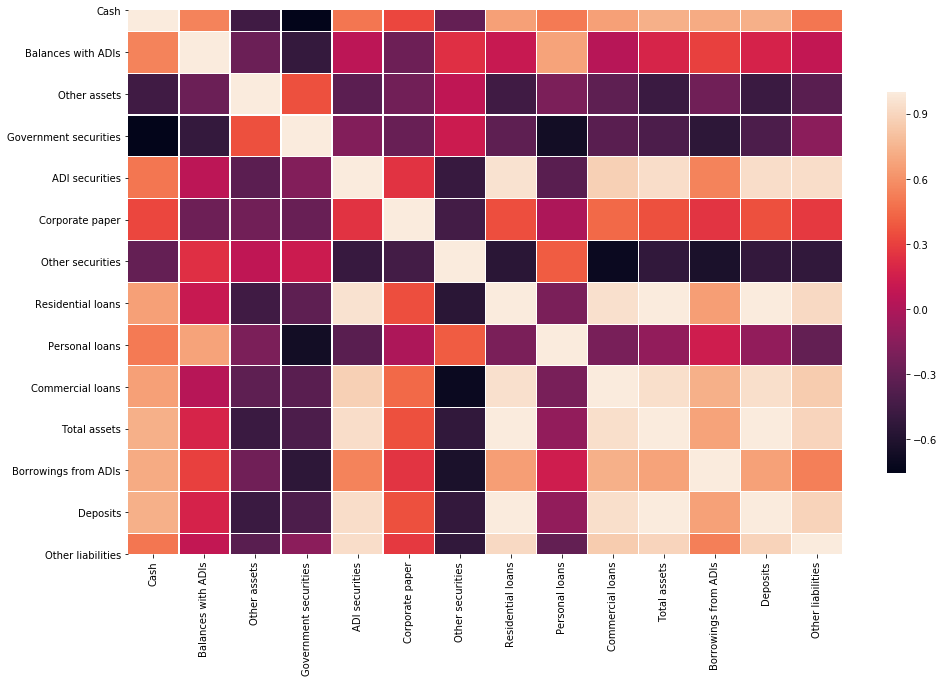

In [7]:
corr = data.corr()
pyplot.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7})           # set length of legend on right

## Interpreting the results

The first column shows the dependent variable. As we go row by row, we see how the independent variable is correlated with the dependent variable. The legend on the right indicates the correlation coefficients. The measures are colour-coded. For example, how is the dependent variable `Residental loans` correlated with the independent variable `Other liabilities`? These variables are positively correlated. Let's plot a scatter diagram and calculate the Pearson correlation coefficient for these variables.

(0.9150267510790289, 1.1022589483822218e-137)


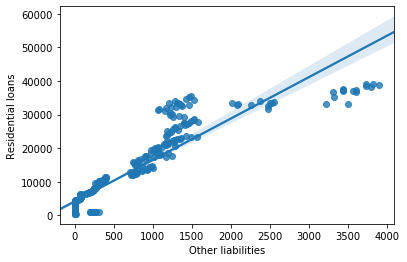

In [8]:
sns.regplot(data['Other liabilities'], data['Residential loans'])
print(stats.pearsonr(data['Other liabilities'], data['Residential loans']))

Scatter plots are useful for spotting linear relationships between the variables. The scatterplot indicates a positive linear relationship between `Residential loans` and `Other liabilities`. We observe a Pearson correlation coefficient $r=0.915$, a strong positive correlation. In machine learning, reducing the number of variables in your dataset (a technique referred to as dimension reduction) prevents one from using too many variables to fit a model. Removing highly correlated variables from a dataset reduces the dimension of your dataset.

See [Overfitting and Underfitting With Machine Learning Algorithms](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) for a discussion on overfitting in machine learning.

### Exercise

Find other highly correlated variables in the dataset. Plot their scatterplot diagrams to what kind of relationship the variables share.

In [51]:
# Let us find other highly correlated variables in the dataset.
columns = []
tuple = []
df = list(data.columns)
for x in df:
  columns.append(x)
del(columns[0])
print(columns)
for x in columns:
    for y in columns:
        if x != y:
            r = stats.pearsonr(data[x], data[y])
            if r[0] >= 0.97:
                print((x,y))

['Cash', 'Balances with ADIs', 'Other assets', 'Government securities', 'ADI securities', 'Corporate paper', 'Other securities', 'Residential loans', 'Personal loans', 'Commercial loans', 'Total assets', 'Borrowings from ADIs', 'Deposits', 'Other liabilities']
('Residential loans', 'Total assets')
('Residential loans', 'Deposits')
('Total assets', 'Residential loans')
('Total assets', 'Deposits')
('Deposits', 'Residential loans')
('Deposits', 'Total assets')


(0.9996131646145039, 0.0)


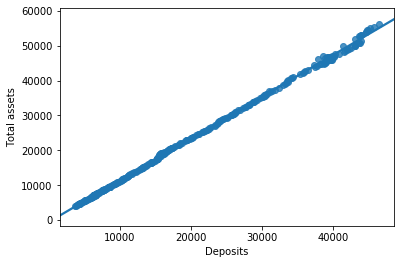

In [50]:
sns.regplot(data['Deposits'], data['Total assets'])
print(stats.pearsonr(data['Deposits'], data['Total assets']))

When the number of deposit increases, the total assets increase as well.

### References

[Pairing the Unknown – Liability Correlations and Asset Allocation](https://www.neamgroup.com/insights/pairing-the-unknown-liability-correlations-and-asset-allocation).